# **Data Science Challenge - Medical Examination** 

|  |  |
|:---|:---|
|**Full Name** | Kingsley Ohere  |
|**Skills Demonstrated** | Python, Data Exploration, Data Wrangling & Feature Engineering, Data Visualization,
|**Section** | Medical Examination  |

---

## **Objective: Medical Examination**

In this notebook, we'll be preparing the data the making use of it to solve some exercises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
demo = pd.read_csv(r"C:\Users\pc\Desktop\Pro_Jets\Data Assignment\DEMO_D.csv")
chol = pd.read_csv(r"C:\Users\pc\Desktop\Pro_Jets\Data Assignment\TCHOL_D.csv")
bp = pd.read_csv(r"C:\Users\pc\Desktop\Pro_Jets\Data Assignment\BPX_D.csv")

### Demographic Data Overview

In [3]:
print(demo.shape)
demo.head()

(10348, 11)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL
0,31127.0,4.0,2.0,1.0,11.0,12.0,5.397605e-79,3.0,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,1.100000e+01,4.0,4.0,NaN,1.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,1.500000e+01,4.0,10.0,NaN,1.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,8.500000e+01,3.0,NaN,4.0,NaN
4,31131.0,4.0,2.0,2.0,535.0,536.0,4.400000e+01,4.0,NaN,4.0,NaN


| Variable     | Description                        | Values / Encodings                                                                                                                            |
| ------------ | ---------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **SEQN**     | Respondent sequence number         | Unique ID (no encoding, continuous)                                                                                                           |
| **SDDSRVYR** | Data release cycle                 | 2 = 2001–2002; 3 = 2003–2004; **4 = 2005–2006**; 5 = 2007–2008 (in this data, they are all supposed to be 4)                                                                            |
| **RIDSTATR** | Interview & exam status            | 1 = Interviewed only; 2 = Both interviewed + examined                                                                                         |
| **RIAGENDR** | Gender                             | 1 = Male; 2 = Female                                                                                                                          |
| **RIDAGEMN** | Age in months (screening, <85 yrs) | Integer months; Top-coded at 85 yrs                                                                                                           |
| **RIDAGEEX** | Age in months (exam, <85 yrs)      | Same as above                                                                                                                                 |
| **RIDAGEYR** | Age in years at time of screening                       | Integer years (0–85, top-coded at 85)                                                                                                         |
| **RIDRETH1** | Race / ethnicity (recode 1)        | 1 = Mexican American; 2 = Other Hispanic; 3 = Non-Hispanic White; 4 = Non-Hispanic Black; 5 = Other Race (incl. Multi-Racial)                 |
| **DMDEDUC3** | Education (for ages 6–19)          | 0 = Never Attended / Kindergarten Only; 1 = 1st Grade; 2 = 2nd Grade; 3 = 3rd Grade; 4 = 4th Grade; 5 = 5th Grade; 6 = 6th Grade; 7 = 7th Grade; 8 = 8th Grade; 9 = 9th Grade; 10 = 10th Grade; 11 = 11th Grade; 12 = 12th Grade, No Diploma; 13 = High School Graduate;	 14 = GED or Equivalent; 15 = More than high school; 55 = Less Than 5th Grade; 66 = Less Than 9th Grade; 77 = Refused;99 - Don't know; |
| **DMDEDUC2** | Education (for adults 20+)           | 1 = Less Than 9th Grade; 2 = 9-11th Grade (Includes 12th grade with no diploma);	3 = High School Grad/GED or Equivalent; 4 = Some College or AA degree; 5 = College Graduate or above; 7 = Refused; 9 = Don't Know                                                                                                                  |
| **DMDSCHOL** | School attendance status           | 1 = In regular school; 2 = On vacation from school (between grades); 3 = Neither in school or on vacation from school (between grades); 7 = Refused; 9 = Don't know            |



### Blood Pressure Overview

In [4]:
print(bp.shape)
bp.head()

(9950, 6)


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A
0,31127.0,1.0,41.0,NaN,100.0,NaN
1,31128.0,1.0,401.0,NaN,NaN,2.0
2,31129.0,1.0,664.0,NaN,NaN,1.0
3,31130.0,2.0,NaN,4.0,NaN,2.0
4,31131.0,1.0,827.0,NaN,NaN,2.0


| Variable     | Description                                                       | Values / Encodings                               |
| ------------ | ----------------------------------------------------------------- | ------------------------------------------------ |
| **SEQN**     | Respondent sequence number                                        | Unique ID                                        |
| **PEASCST1** | Blood Pressure Status           | 1 = Complete; 2 = Partial; 3 = Not done|
| **PEASCTM1** | Blood Pressure Time in Seconds     | Numeric (range 2 to 2679)    |
| **PEASCCT1** | Blood Pressure Comment                                                    | 1 = Safety exclusion; 2 = SP refusal; 3 = No time; 4 = Physical limitation; 5 = Communication problem; 7 = SP ill/emergency; 14 = Interrupted; 56 = Came late/left early; 84 = SP with child; 99 = Other|
| **BPXCHR**   | Heart rate (beats per minute)                                     | Numeric (range 0 to 288)                    |
| **BPQ150A**  | Had food in the past 30 minutes | 1 = Yes; 2 = No    |


### Cholesterol Overview

In [22]:
print(chol.shape)
chol.head()

(8086, 3)


,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


| Variable | Description                                | Values / Encodings                    |
|---------|--------------------------------------------|----------------------------------------|
| **SEQN**   | Respondent sequence number                 | Unique ID                              |
| **LBXTC**  | Total Cholesterol (mg/dL)                  | Numeric                                |
| **LBDTCSI**| Total Cholesterol (Imputed/Converted value)| Numeric                                |


In [6]:
print(chol.shape)
chol.head()

(8086, 3)


,SEQN,LBXTC,LBDTCSI
0,31128.0,129.0,3.34
1,31129.0,170.0,4.40
2,31130.0,NaN,NaN
3,31131.0,105.0,2.72
4,31132.0,147.0,3.80


#### Merging datasets

In [7]:
df = pd.merge(demo, bp, on="SEQN", how="inner")

df = pd.merge(df, chol, on="SEQN", how="inner")

print(df.shape)
df.head()

(8086, 18)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI
0,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34
1,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40
2,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN
3,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72
4,31132.0,4.0,2.0,1.0,842.0,843.0,70.0,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80


In [8]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8086 entries, 0 to 8085
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8086 non-null   float64
 1   SDDSRVYR  8086 non-null   float64
 2   RIDSTATR  8086 non-null   float64
 3   RIAGENDR  8086 non-null   float64
 4   RIDAGEMN  7938 non-null   float64
 5   RIDAGEEX  7917 non-null   float64
 6   RIDAGEYR  8086 non-null   float64
 7   RIDRETH1  8086 non-null   float64
 8   DMDEDUC3  3312 non-null   float64
 9   DMDEDUC2  4773 non-null   float64
 10  DMDSCHOL  3076 non-null   float64
 11  PEASCST1  8086 non-null   float64
 12  PEASCTM1  7805 non-null   float64
 13  PEASCCT1  360 non-null    float64
 14  BPXCHR    356 non-null    float64
 15  BPQ150A   7455 non-null   float64
 16  LBXTC     7360 non-null   float64
 17  LBDTCSI   7360 non-null   float64
dtypes: float64(18)
memory usage: 1.1 MB


In [9]:
# Converting the RIDAGEYR feature to int for better readability.
df1['RIDAGEYR'] = df1['RIDAGEYR'].astype('int64')
df1.tail()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI
8081,41469.0,4.0,2.0,1.0,235.0,235.0,19,4.0,15.0,NaN,1.0,1.0,715.0,NaN,NaN,2.0,193.0,4.99
8082,41471.0,4.0,2.0,1.0,148.0,149.0,12,4.0,5.0,NaN,1.0,1.0,703.0,NaN,NaN,2.0,142.0,3.67
8083,41472.0,4.0,2.0,1.0,410.0,411.0,34,3.0,NaN,4.0,NaN,1.0,567.0,NaN,NaN,2.0,140.0,3.62
8084,41473.0,4.0,2.0,1.0,255.0,255.0,21,1.0,NaN,2.0,NaN,1.0,645.0,NaN,NaN,2.0,184.0,4.76
8085,41474.0,4.0,2.0,2.0,200.0,200.0,16,4.0,11.0,NaN,2.0,1.0,579.0,NaN,NaN,2.0,101.0,2.61


**Exercise 1:** The existing features RIDAGEMN and RIDAGEEX contain the age of the respondent at screening and examination, respectively; however, both contain some missing values.  

1. Create a new feature AGE_AT_SCREENING with no missing values that contains the most precise estimate of each respondent’s age (in months) at the time of screening. Choose an appropriate strategy to estimate the missing values and explain your 
reasoning.

3. Create a second feature AGE_AT_EXAM with no missing values that contains the most precise estimate of each respondent’s age (in months) at the time of the follow-up examination. Choose an appropriate strategy to estimate the missing values and explain 
your reasoning.  

In [10]:
# Check missing values in all three age columns
print("Missing values:")
print(df1[['RIDAGEMN', 'RIDAGEEX', 'RIDAGEYR']].isnull().sum())

# Check the pattern of missing values
print("\nMissing value patterns:")
print(f"Both RIDAGEMN and RIDAGEEX missing: {df1[df1['RIDAGEMN'].isnull() & df1['RIDAGEEX'].isnull()].shape[0]}")
print(f"Only RIDAGEMN missing: {df1[df1['RIDAGEMN'].isnull() & df1['RIDAGEEX'].notnull()].shape[0]}")
print(f"Only RIDAGEEX missing: {df1[df1['RIDAGEMN'].notnull() & df1['RIDAGEEX'].isnull()].shape[0]}")

# Calculate the typical time gap between screening and exam
df['time_gap'] = df['RIDAGEEX'] - df['RIDAGEMN']
print(f"\nTime gap statistics (months between screening and exam):")
print(df['time_gap'].describe())
print(f"Median time gap: {df['time_gap'].median()}")

Missing values:
RIDAGEMN    148
RIDAGEEX    169
RIDAGEYR      0
dtype: int64

Missing value patterns:
Both RIDAGEMN and RIDAGEEX missing: 148
Only RIDAGEMN missing: 0
Only RIDAGEEX missing: 21

Time gap statistics (months between screening and exam):
count    7917.000000
mean        0.824934
std         0.604781
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: time_gap, dtype: float64
Median time gap: 1.0


**Exercise 1 Task 1 Approach:** Now that we have more information on the missing values, we know that RIDAGEMN contains the precise age in months at screening, so we use it when available. For the 148 missing cases, we convert RIDAGEYR (years) to months by simply multiplyin it by 12. 

In [11]:
# For missing values, fill with RIDAGEYR converted to months (RIDAGEYR * 12)
df1['AGE_AT_SCREENING'] = df1['RIDAGEMN'].fillna(df1['RIDAGEYR'] * 12)

print(df1[['AGE_AT_SCREENING']].isnull().sum())
df1.head()

AGE_AT_SCREENING    0
dtype: int64


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING
0,31128.0,4.0,2.0,2.0,132.0,132.0,11,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,842.0


**Exercise 1 Task 2 Approach** I recon We use actual exam age when available; for missing values, we make use of the median 1-month gap gotten from the time gap analysis, which is the most representative estimate of when exams typically occur.

In [12]:
# For missing values, add 1 month to AGE_AT_SCREENING (the median time gap)
df1['AGE_AT_EXAM'] = df1['RIDAGEEX'].fillna(df1['AGE_AT_SCREENING'] + 1)
print(df1[['AGE_AT_EXAM']].isnull().sum())

df1.head()

AGE_AT_EXAM    0
dtype: int64


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM
0,31128.0,4.0,2.0,2.0,132.0,132.0,11,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0
1,31129.0,4.0,2.0,1.0,189.0,190.0,15,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0
2,31130.0,4.0,2.0,2.0,NaN,NaN,85,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1021.0
3,31131.0,4.0,2.0,2.0,535.0,536.0,44,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0
4,31132.0,4.0,2.0,1.0,842.0,843.0,70,3.0,NaN,5.0,NaN,1.0,730.0,NaN,NaN,2.0,147.0,3.80,842.0,843.0


**Exercise 2**: The existing features DMDEDUC3 and DMDEDUC2 contain categorical responses for each respondent’s highest level of education completed: however, the categories are somewhat overlapping and complicated.  

Create a new categorical feature HIGHEST_EDUCATION with the following categories: ELEMENTARY (did not graduate HS, or currently in grades K-12), HIGHSCHOOL (graduated or GED), and COLLEGE (4 year graduates only). This feature should reflect the highest level of education completed for each 
respondent, from among the 3 options. Choose an appropriate strategy to fill in any missing values and explain your reasoning. 

In [13]:
# Checking unique values and meaning
print("DMDEDUC3 unique values and counts:")
print(df1['DMDEDUC3'].value_counts(dropna=False))

print("\nDMDEDUC2 unique values and counts:")
print(df1['DMDEDUC2'].value_counts(dropna=False))

# Check missing value patterns
print(f"\nDMDEDUC3 missing: {df1['DMDEDUC3'].isna().sum()}")
print(f"DMDEDUC2 missing: {df1['DMDEDUC2'].isna().sum()}")
print(f"Both missing: {df1[df1['DMDEDUC3'].isna() & df1['DMDEDUC2'].isna()].shape[0]}")

# Check age distribution to understand which education variable applies to whom
print("\nAge distribution for those with DMDEDUC3:")
print(df1[df1['DMDEDUC3'].notna()]['RIDAGEYR'].describe())

print("\nAge distribution for those with DMDEDUC2:")
print(df1[df1['DMDEDUC2'].notna()]['RIDAGEYR'].describe())

DMDEDUC3 unique values and counts:
DMDEDUC3
NaN             4774
1.000000e+01     300
8.000000e+00     294
9.000000e+00     282
6.000000e+00     280
1.100000e+01     264
7.000000e+00     255
5.397605e-79     232
3.000000e+00     204
1.300000e+01     204
5.000000e+00     201
4.000000e+00     197
1.000000e+00     185
2.000000e+00     182
1.500000e+01     139
1.200000e+01      46
6.600000e+01      36
1.400000e+01      10
9.900000e+01       1
Name: count, dtype: int64

DMDEDUC2 unique values and counts:
DMDEDUC2
NaN    3313
4.0    1361
3.0    1136
5.0     939
2.0     733
1.0     597
7.0       4
9.0       3
Name: count, dtype: int64

DMDEDUC3 missing: 4774
DMDEDUC2 missing: 3313
Both missing: 1

Age distribution for those with DMDEDUC3:
count    3312.000000
mean       13.169988
std         3.929817
min         6.000000
25%        10.000000
50%        14.000000
75%        17.000000
max        19.000000
Name: RIDAGEYR, dtype: float64

Age distribution for those with DMDEDUC2:
count    4773.00

**Exercise 2 Task Approach:** mapped valid education codes to the three categories based on their definitions, treating ambiguous cases conservatively (not assuming 4-year completion unless explicitly stated). For missing values, age-based imputation was used, because age is strongly correlates with education level and allowed me to make reasonable assumptions about where someone is in their educational journey.

In [14]:
# DMDEDUC3 mapping (for youth 6-19)
DMDEDUC3_mapping = {
    # ELEMENTARY: Currently in K-12 or didn't graduate HS
    0: 'ELEMENTARY', 1: 'ELEMENTARY', 2: 'ELEMENTARY', 
    3: 'ELEMENTARY', 4: 'ELEMENTARY', 5: 'ELEMENTARY',   
    6: 'ELEMENTARY', 7: 'ELEMENTARY', 8: 'ELEMENTARY',  
    9: 'ELEMENTARY', 10:'ELEMENTARY', 11: 'ELEMENTARY',  
    12:'ELEMENTARY', 55:'ELEMENTARY',66: 'ELEMENTARY', 
    
    # HIGHSCHOOL: Graduated or GED
    13: 'HIGHSCHOOL', 
    14: 'HIGHSCHOOL',
    
    # More than high school (conservative - map to HIGHSCHOOL since unlikely to have 4-year degree at ages 6-19)
    15: 'HIGHSCHOOL', 
    
    # Invalid data (will be mapped to the Elementary grade)
    77: 'ELEMENTARY',      
    99: 'ELEMENTARY'        
}

In [15]:
# DMDEDUC2 mapping (for adults 20+)
DMDEDUC2_mapping = {
    # ELEMENTARY: Did not graduate HS
    1: 'ELEMENTARY',
    2: 'ELEMENTARY',
    
    # HIGHSCHOOL: Graduated HS/GED or some college (not 4-year grads)
    3: 'HIGHSCHOOL',
    4: 'HIGHSCHOOL',
    
    # COLLEGE: 4-year graduates only
    5: 'COLLEGE', 
    
    # Invalid responses (will be treated as missing)
    7: np.nan,     
    9: np.nan 
}

In [16]:
# Apply mappings to create intermediate columns
df1['EDUC_FROM_DMDEDUC3'] = df1['DMDEDUC3'].map(DMDEDUC3_mapping)
df1['EDUC_FROM_DMDEDUC2'] = df1['DMDEDUC2'].map(DMDEDUC2_mapping)

# Combine the two education columns with priority to DMDEDUC3, then DMDEDUC2
# Use DMDEDUC3 if available, otherwise use DMDEDUC2
df1['HIGHEST_EDUCATION'] = df1['EDUC_FROM_DMDEDUC3'].fillna(df1['EDUC_FROM_DMDEDUC2'])

In [17]:
# Fill remaining missing values using age-based logic
def age_based_education(row):
    """
    Impute education level based on age when education data is missing.
    
    Reasoning:
    - Ages 6-17: Likely still in K-12 (ELEMENTARY)
    - Ages 18-19: Typical HS graduation age (HIGHSCHOOL)
    - Ages 20+: Most common adult education level (HIGHSCHOOL)
    """
    if pd.isna(row['HIGHEST_EDUCATION']):
        age = row['RIDAGEYR']
        if age <= 17:
            return 'ELEMENTARY'
        else:  # ages 18+
            return 'HIGHSCHOOL'
    return row['HIGHEST_EDUCATION']

# Apply age-based imputation for missing values
df1['HIGHEST_EDUCATION'] = df1.apply(age_based_education, axis=1)

# Verify results
print("\nHIGHEST_EDUCATION value counts:")
print(df1['HIGHEST_EDUCATION'].value_counts())


HIGHEST_EDUCATION value counts:
HIGHEST_EDUCATION
ELEMENTARY    4290
HIGHSCHOOL    2857
COLLEGE        939
Name: count, dtype: int64


In [18]:
print("\nMissing values in HIGHEST_EDUCATION:")
print(df1['HIGHEST_EDUCATION'].isnull().sum())
df1.head()


Missing values in HIGHEST_EDUCATION:
0


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,...,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,EDUC_FROM_DMDEDUC3,EDUC_FROM_DMDEDUC2,HIGHEST_EDUCATION
0,31128.0,4.0,2.0,2.0,132.0,132.0,11,4.0,4.0,NaN,...,NaN,NaN,2.0,129.0,3.34,132.0,132.0,ELEMENTARY,NaN,ELEMENTARY
1,31129.0,4.0,2.0,1.0,189.0,190.0,15,4.0,10.0,NaN,...,NaN,NaN,1.0,170.0,4.40,189.0,190.0,ELEMENTARY,NaN,ELEMENTARY
2,31130.0,4.0,2.0,2.0,NaN,NaN,85,3.0,NaN,4.0,...,4.0,NaN,2.0,NaN,NaN,1020.0,1021.0,NaN,HIGHSCHOOL,HIGHSCHOOL
3,31131.0,4.0,2.0,2.0,535.0,536.0,44,4.0,NaN,4.0,...,NaN,NaN,2.0,105.0,2.72,535.0,536.0,NaN,HIGHSCHOOL,HIGHSCHOOL
4,31132.0,4.0,2.0,1.0,842.0,843.0,70,3.0,NaN,5.0,...,NaN,NaN,2.0,147.0,3.80,842.0,843.0,NaN,COLLEGE,COLLEGE


**Exercise 3:**: The file DEMO_RETIRED.CSV contains a single feature named RETIRED which is a binary flag indicating 
whether the respondent is retired (1) or not (0). This feature has some missing values.  

Suggest an appropriate strategy to fill in the missing values. Justify your approach using graphs or 
statistics. 

In [19]:
rtd = pd.read_csv(r"C:\Users\pc\Desktop\Pro_Jets\Data Assignment\DEMO_RETIRED.CSV.xls")
print(rtd.shape)
rtd.head()

(10348, 2)


,SEQN,RETIRED
0,31127.0,NaN
1,31128.0,0.0
2,31129.0,0.0
3,31130.0,1.0
4,31131.0,0.0


let's merge this with our df1 and carry on

In [20]:
df1 = pd.merge(df1, rtd, on="SEQN", how="outer")
df1.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,...,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,EDUC_FROM_DMDEDUC3,EDUC_FROM_DMDEDUC2,HIGHEST_EDUCATION,RETIRED
0,31127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,...,NaN,2.0,129.0,3.34,132.0,132.0,ELEMENTARY,NaN,ELEMENTARY,0.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,...,NaN,1.0,170.0,4.40,189.0,190.0,ELEMENTARY,NaN,ELEMENTARY,0.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,...,NaN,2.0,NaN,NaN,1020.0,1021.0,NaN,HIGHSCHOOL,HIGHSCHOOL,1.0
4,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,...,NaN,2.0,105.0,2.72,535.0,536.0,NaN,HIGHSCHOOL,HIGHSCHOOL,0.0


In [21]:
print("RETIRED unique values and counts:")
print(df1['RETIRED'].value_counts(dropna=False))

RETIRED unique values and counts:
RETIRED
0.0    7073
NaN    2262
1.0    1013
Name: count, dtype: int64


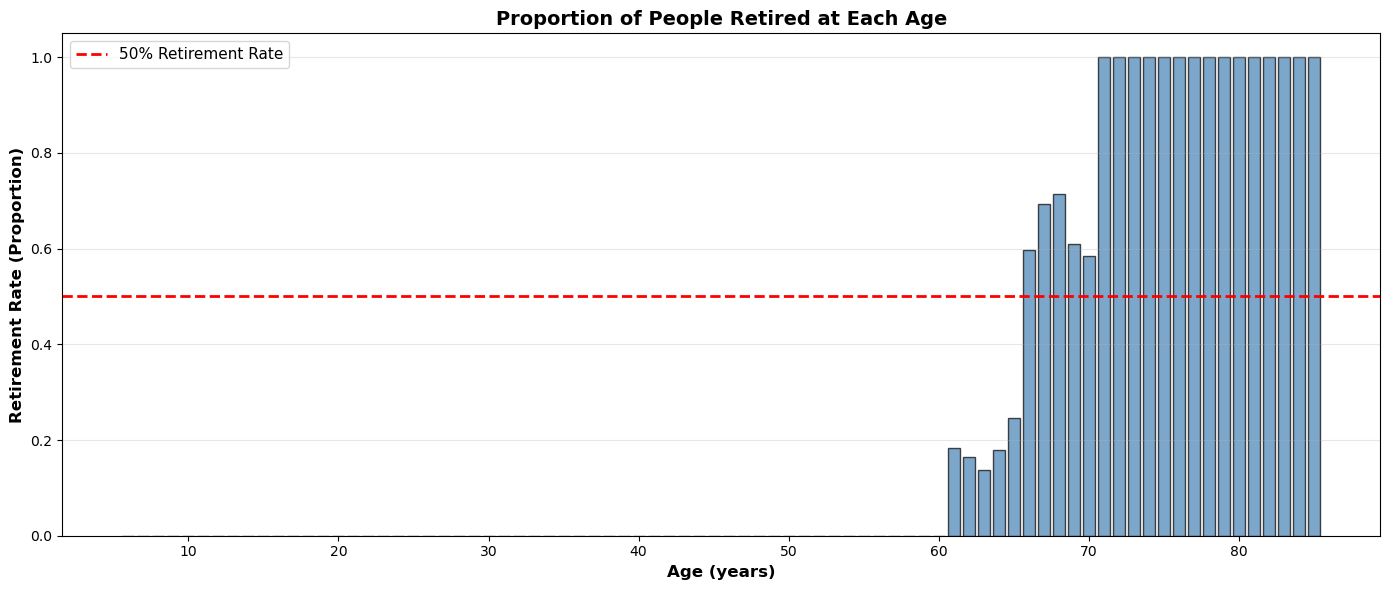

In [24]:
# Use only valid (non-missing) RETIRED data
valid_data = df1[df1['RETIRED'].notna()].copy()

# Calculate retirement rate for each age
retirement_by_age = valid_data.groupby('RIDAGEYR')['RETIRED'].mean()

# Create the plot
plt.figure(figsize=(14, 6))
plt.bar(retirement_by_age.index, retirement_by_age.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Age (years)', fontsize=12, fontweight='bold')
plt.ylabel('Retirement Rate (Proportion)', fontsize=12, fontweight='bold')
plt.title('Proportion of People Retired at Each Age', fontsize=14, fontweight='bold')
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='50% Retirement Rate')
plt.grid(axis='y', alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

**Exercise 3 Task Approach:** To fill the 1,864 missing values in the RETIRED feature, I'll use an age-based threshold approach with age 65 as the cutoff (as backed up by the traditional US retirement age). Analysis of the 8,086 valid records revealed that retirement is strongly age-dependent: no one under age 61 was retired, retirement rates remain low (18-25%) between ages 61-65, jump significantly to 60-70% for ages 66-70, and reach 100% by age 71. , I imputed missing values as 0 (not retired) for individuals under 65 and 1 (retired) for those 65 and older. This strategy minimizes classification error by aligning with observed retirement patterns in the data.

In [27]:
# Fill missing RETIRED values based on age threshold of 65
def fill_retired(row):
    if pd.isna(row['RETIRED']):
        # If age >= 65, assume retired (1), else not retired (0)
        return 1 if row['RIDAGEYR'] >= 65 else 0
    else:
        return row['RETIRED']

# Apply the imputation
df1['RETIRED'] = df1.apply(fill_retired, axis=1)

In [28]:
# To view all feature in the data frame wit use this apprroach
pd.set_option('display.max_columns', None)
df1.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEMN,RIDAGEEX,RIDAGEYR,RIDRETH1,DMDEDUC3,DMDEDUC2,DMDSCHOL,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPQ150A,LBXTC,LBDTCSI,AGE_AT_SCREENING,AGE_AT_EXAM,EDUC_FROM_DMDEDUC3,EDUC_FROM_DMDEDUC2,HIGHEST_EDUCATION,RETIRED
0,31127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,31128.0,4.0,2.0,2.0,132.0,132.0,11.0,4.0,4.0,NaN,1.0,1.0,401.0,NaN,NaN,2.0,129.0,3.34,132.0,132.0,ELEMENTARY,NaN,ELEMENTARY,0.0
2,31129.0,4.0,2.0,1.0,189.0,190.0,15.0,4.0,10.0,NaN,1.0,1.0,664.0,NaN,NaN,1.0,170.0,4.40,189.0,190.0,ELEMENTARY,NaN,ELEMENTARY,0.0
3,31130.0,4.0,2.0,2.0,NaN,NaN,85.0,3.0,NaN,4.0,NaN,2.0,NaN,4.0,NaN,2.0,NaN,NaN,1020.0,1021.0,NaN,HIGHSCHOOL,HIGHSCHOOL,1.0
4,31131.0,4.0,2.0,2.0,535.0,536.0,44.0,4.0,NaN,4.0,NaN,1.0,827.0,NaN,NaN,2.0,105.0,2.72,535.0,536.0,NaN,HIGHSCHOOL,HIGHSCHOOL,0.0


**These concludes this note book, all exercises done. Our data is now prepared and given more meaning.** 